<a href="https://colab.research.google.com/github/mrrkdas/LazyProgrammer-DeepLearning-Course/blob/main/CNN_with_cifar_10_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


# Preprocessing

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

## Model

In [5]:
input = Input((32, 32, 3))


conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')
x = conv1(input)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

output = Dense(10, activation='softmax')(x)

model = Model(input, output)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['sparse_categorical_accuracy'])

In [11]:
# Fitting data using data augmentation
batch_size = 32
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_gen = data_gen.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size # X_train.shape[0] in (50000, 32, 32, 3) is the 50000

In [16]:
r = model.fit(train_gen, epochs = 15, steps_per_epoch = steps_per_epoch, validation_data = (X_test, y_test))

Epoch 1/15
1562/1562 [==============================] - 112s 72ms/step - loss: 1.2752 - sparse_categorical_accuracy: 0.5442 - val_loss: 1.1086 - val_sparse_categorical_accuracy: 0.6191
Epoch 2/15
1562/1562 [==============================] - 53s 34ms/step - loss: 0.9669 - sparse_categorical_accuracy: 0.6631 - val_loss: 0.8898 - val_sparse_categorical_accuracy: 0.6938
Epoch 3/15
1562/1562 [==============================] - 54s 34ms/step - loss: 0.8322 - sparse_categorical_accuracy: 0.7141 - val_loss: 0.7204 - val_sparse_categorical_accuracy: 0.7571
Epoch 4/15
1562/1562 [==============================] - 53s 34ms/step - loss: 0.7468 - sparse_categorical_accuracy: 0.7427 - val_loss: 0.8388 - val_sparse_categorical_accuracy: 0.7264
Epoch 5/15
1562/1562 [==============================] - 54s 34ms/step - loss: 0.6831 - sparse_categorical_accuracy: 0.7669 - val_loss: 0.5903 - val_sparse_categorical_accuracy: 0.7990
Epoch 6/15
1562/1562 [==============================] - 54s 34ms/step - loss: 0

## After Model

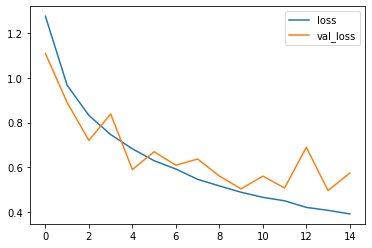

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

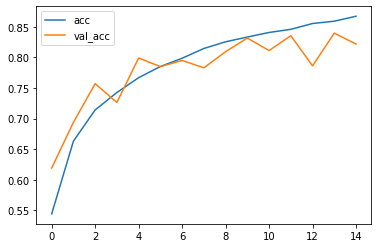

In [19]:
plt.plot(r.history['sparse_categorical_accuracy'], label='acc')
plt.plot(r.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[837   7  35  19   9   2  31  10  28  22]
 [  5 914   0   3   1   0  15   1  12  49]
 [ 36   0 748  23  12  22 134  22   2   1]
 [ 13   1  35 680  18  64 156  28   2   3]
 [  8   0  47  31 688   4 182  39   1   0]
 [  4   1  30 124  16 663 110  47   0   5]
 [  2   0   5  10   1   1 978   3   0   0]
 [  5   0   8  20  18  19  30 894   0   6]
 [ 37   8  10   6   2   0  24   2 889  22]
 [ 11  31   1   7   0   0  16   3   4 927]]


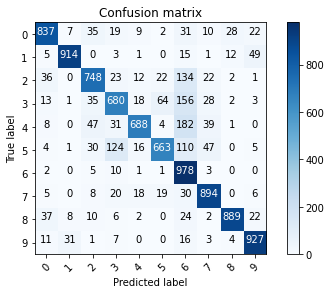

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))